In [1]:
#Add Matplotlib inline magic command
%matplotlib inline
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Files to load
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"


In [3]:
#Read the city data file and store it in a pandas DataFrame.
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#Read the ride data file and store it in a pandas DataFrame. 
#parse_dates=["date"] allows 'date' column to be read as datetime datatype
ride_data_df=pd.read_csv(ride_data_to_load, parse_dates=["date"])
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12
5,South Latoya,2019-03-11 12:26:00,9.52,1.995000e+12
6,New Paulville,2019-02-27 11:17:00,43.25,7.932080e+11
7,Simpsonburgh,2019-04-26 00:43:00,35.98,1.119540e+11
8,South Karenland,2019-01-08 03:28:00,35.09,7.995620e+12
9,North Jasmine,2019-03-09 06:26:00,42.81,5.327640e+12


In [5]:
#Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
#Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [11]:
#Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [12]:
#Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
#Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [17]:
#Get the data types of each column.
ride_data_df.dtypes

city               object
date       datetime64[ns]
fare              float64
ride_id           float64
dtype: object

In [18]:
#Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
#Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban


In [19]:
#Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
#Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban


In [20]:
#Find total and averages by groupby

total_rides=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_drivers=city_data_df.groupby(["type"]).sum()["driver_count"]
total_fares=pyber_data_df.groupby(["type"]).sum()["fare"]
avg_fare_ride=(total_fares/total_rides)
avg_fare_driver=total_fares/total_drivers

summary_df=pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers" : total_drivers,
    "Total Fares" : total_fares,
    "Average Fare per Ride" : avg_fare_ride,
    "Average Fare per Driver": avg_fare_driver
})
summary_df["Average Fare per Ride"]=summary_df["Average Fare per Ride"].map("${:.02f}".format)
summary_df["Average Fare per Driver"]=summary_df["Average Fare per Driver"].map("${:.02f}".format)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,$34.62,$55.49
Suburban,625,490,19356.33,$30.97,$39.50
Urban,1625,2405,39854.38,$24.53,$16.57


Multiple-Line Plot

In [21]:
#Rename Columns
pyber_data_df.rename(columns={"city":"City", "date":"Date","fare":"Fare","ride_id":"Ride Id","driver_count":"No. Drivers","type":"City Type"}, inplace=True)
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:00,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:00,20.76,9.018730e+12,2,Rural
2372,North Jaime,2019-02-10 21:03:00,11.11,2.781340e+12,1,Rural
2373,West Heather,2019-05-07 19:22:00,44.94,4.256850e+12,4,Rural


In [22]:
#Set index to "Date"
pyber_data_df.set_index("Date")

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:00,Lake Jonathanshire,13.83,5.739410e+12,5,Urban
2019-03-04 18:24:00,South Michelleport,30.24,2.343910e+12,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2.005070e+12,57,Urban
2019-02-10 23:22:00,Rodneyfort,23.44,5.149250e+12,34,Urban
2019-03-06 04:28:00,South Jack,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:00,Michaelberg,13.38,8.550370e+12,6,Rural
2019-01-30 00:05:00,Lake Latoyabury,20.76,9.018730e+12,2,Rural
2019-02-10 21:03:00,North Jaime,11.11,2.781340e+12,1,Rural


In [23]:
#Create DF for fares, date, and city type using copy()
pyber_data_new_df=pyber_data_df[["Date","City Type","Fare"]].copy()
pyber_data_new_df

,Date,City Type,Fare
0,2019-01-14 10:14:00,Urban,13.83
1,2019-03-04 18:24:00,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44
3,2019-02-10 23:22:00,Urban,23.44
4,2019-03-06 04:28:00,Urban,34.58
...,...,...,...
2370,2019-04-29 17:04:00,Rural,13.38
2371,2019-01-30 00:05:00,Rural,20.76
2372,2019-02-10 21:03:00,Rural,11.11
2373,2019-05-07 19:22:00,Rural,44.94


In [24]:
#Set index to datetime data type
pyber_data_new_df=pyber_data_new_df.sort_values("Date")
pyber_data_new_df=pyber_data_new_df.set_index("Date")
pyber_data_new_df

,City Type,Fare
Date,,
2019-01-01 00:08:00,Urban,37.91
2019-01-01 00:46:00,Suburban,47.74
2019-01-01 02:07:00,Suburban,24.07
2019-01-01 03:46:00,Urban,7.57
2019-01-01 05:23:00,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:00,Urban,18.45
2019-05-08 07:29:00,Urban,18.55


In [25]:
#Make sure date is of datetime datatype
pyber_data_new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:00 to 2019-05-08 13:10:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [26]:
#Calculate sum() of fares
total_fares_city1_df=pyber_data_new_df.groupby(["City Type","Date"]).sum()

total_fares_city1_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:00  43.69
          2019-01-02 11:18:00  52.12
          2019-01-03 19:51:00  19.90
          2019-01-04 03:31:00  24.88
          2019-01-06 07:38:00  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:00  18.45
          2019-05-08 07:29:00  18.55
          2019-05-08 11:38:00  19.77
          2019-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [27]:
total_fares_city1_df.reset_index()



,City Type,Date,Fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
...,...,...,...
2359,Urban,2019-05-08 04:20:00,21.99
2360,Urban,2019-05-08 04:39:00,18.45
2361,Urban,2019-05-08 07:29:00,18.55
2362,Urban,2019-05-08 11:38:00,19.77


In [28]:
#Create a pivot table DataFrame
fares_pivot_table=pd.pivot_table(total_fares_city1_df, values='Fare', index=['Date'], columns=['City Type'], aggfunc=np.sum)
fares_pivot_table


City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [29]:
#Pivot Table based on dates
new_fares_pivot_table=fares_pivot_table.loc["2019-01-01":"2019-04-28"]
new_fares_pivot_table


City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [30]:
#Resample DataFrame by week and calculate sum()
weekly_fares = new_fares_pivot_table.resample('W').sum()
weekly_fares

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [31]:
import matplotlib.style as style

In [32]:
style.use('fivethirtyeight')


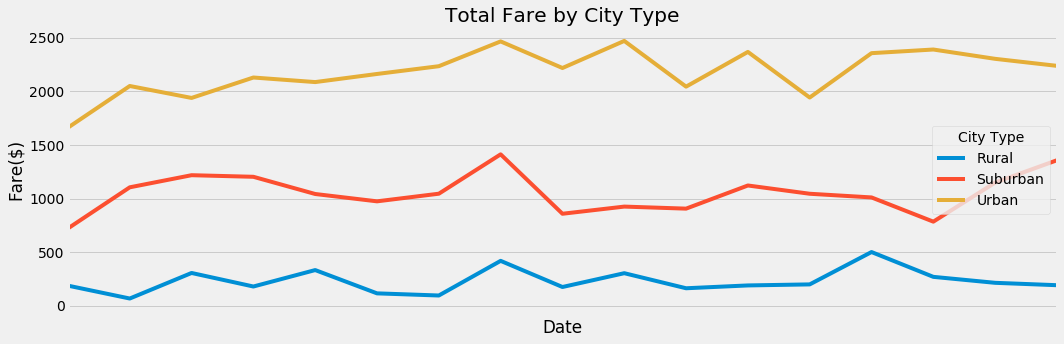

In [38]:
weekly_fares.plot(
    figsize=(15,5),
    xticks=range(49,12)).legend(title="City Type")
plt.xlabel("Date")
plt.ylabel("Fare($)")
plt.title("Total Fare by City Type")
plt.tight_layout()
#Save Figure
plt.savefig("analysis/ChallengeFig.png")